In [1]:
#This model incorporates the training application & credit card balances.


In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import eli5

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GaussianNoise
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from eli5.sklearn import PermutationImportance


In [2]:
#Define Path

file_path = Path("Data/Training_Data.csv")
training_df = pd.read_csv(file_path)
training_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cc_path = Path("Data/credit_card_balance.csv")
cc_df = pd.read_csv(cc_path)

cc_df.head()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [4]:
merged = pd.merge(left=training_df, right=cc_df, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [6]:
new_merged = merged.drop(columns=['SK_ID_PREV','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_ANNUITY','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','REGION_POPULATION_RELATIVE','OWN_CAR_AGE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])

In [7]:
#Identify Null Values

new_merged.isnull().sum() / len(new_merged) * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_GOODS_PRICE                  0.012353
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_HOUSING_TYPE                0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
OCCUPATION_TYPE                 29.810232
REG_REGION_NOT_LIVE_REGION       0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
ORGANIZATION_TYPE                0

In [8]:
# Identify Duplicates

new_merged['SK_ID_CURR'].duplicated()

0          False
1          False
2          False
3          False
4           True
           ...  
3448566    False
3448567    False
3448568    False
3448569    False
3448570    False
Name: SK_ID_CURR, Length: 3448571, dtype: bool

In [9]:
#Drop Null Values
# training_df_2 = new_merged.dropna()

def fill_in(data):
    for i in data.columns:
        if data[i].dtype == "object":
            data[i] = data[i].fillna("")
        elif (data[i].dtype == "int64" or data[i].dtype == "float64"):
            data[i] = data[i].fillna(data[i].mean())
        else:
            pass
    return data

training_df_2 = fill_in(new_merged)

In [10]:
#Generate dummie values for descriptive data

training_df_3 = pd.get_dummies(training_df_2,columns=['NAME_HOUSING_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE','NAME_CONTRACT_STATUS','OCCUPATION_TYPE'])

In [11]:
training_df_3["AGE"] = round(abs(training_df_3["DAYS_BIRTH"])/365)

In [12]:
training_df_3["EMPLOYED_LENGTH"] = round(abs(training_df_3["DAYS_EMPLOYED"])/365)

In [13]:
training_df_3["REGISTRATION_LENGTH"] = round(abs(training_df_3["DAYS_REGISTRATION"])/365)

In [14]:
training_df_3["PUBLISH_LENGTH"] = round(abs(training_df_3["DAYS_ID_PUBLISH"])/365)

In [15]:
training_df_3.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,AGE,EMPLOYED_LENGTH,REGISTRATION_LENGTH,PUBLISH_LENGTH
0,100002,1,202500.0,406597.5,351000.0,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0,0,26.0,2.0,10.0,6.0
1,100003,0,270000.0,1293502.5,1129500.0,-16765,-1188,-1186.0,-291,1,...,0,0,0,0,0,0,46.0,3.0,3.0,1.0
2,100004,0,67500.0,135000.0,135000.0,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0,0,52.0,1.0,12.0,7.0
3,100006,0,135000.0,312682.5,297000.0,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0,0,52.0,8.0,27.0,7.0
4,100006,0,135000.0,312682.5,297000.0,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0,0,52.0,8.0,27.0,7.0


In [16]:
#Define X and y variables

y = training_df_3["TARGET"].values
y = y.reshape(-1, 1)

X = training_df_3.drop(columns=["TARGET","DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'])


In [17]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [18]:
X_train.shape

(2413999, 158)

In [19]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=78)

In [20]:
# Create scaler instance
X_scaler = StandardScaler()

In [21]:
X_scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
number_inputs = 255
number_hidden_nodes = 255
dropout_fraction = 0.20

nn = Sequential()

nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn.add(GaussianNoise(0.1, input_shape=(2,)))
nn.add(Dropout(dropout_fraction))

nn.add(Dense(units=125, input_dim=255, activation="tanh"))
nn.add(GaussianNoise(0.1, input_shape=(2,)))
nn.add(Dropout(dropout_fraction))

nn.add(Dense(units=60, input_dim=255, activation="tanh"))
nn.add(GaussianNoise(0.1, input_shape=(2,)))
nn.add(Dropout(dropout_fraction))

nn.add(Dense(1, activation="sigmoid"))

In [24]:
# This is 

# input_ = keras.layers.Input(shape=[307511, 158])
# flatten = keras.layers.Flatten(input_shape=[307511, 158])(input_)
# hidden1 = keras.layers.Dense(100, activation="relu")(flatten)
# hidden2 = keras.layers.Dense(50, activation='relu')(hidden1)
# hidden3 = keras.layers.Dense(25, activation='relu')(hidden2)
# reshap = keras.layers.Reshape((307511, 158))(hidden3)
# concat_ = keras.layers.Concatenate()([input_, reshap])
# flatten2 = keras.layers.Flatten(input_shape=[307511, 158])(concat_)
# output = keras.layers.Dense(1, activation='sigmoid')(flatten2)
# nn = keras.Model(inputs=[input_], outputs=[output] )

In [25]:
#Optimizing the Learning Rate

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [26]:
#2 nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=["accuracy"])

nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"]) #1

#3 model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [27]:
model = nn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
56579/56579 [==============================] - 104s 2ms/step - loss: 0.2058 - accuracy: 0.9374
Epoch 2/30
56579/56579 [==============================] - 99s 2ms/step - loss: 0.1534 - accuracy: 0.9518
Epoch 3/30
56579/56579 [==============================] - 100s 2ms/step - loss: 0.1376 - accuracy: 0.9567
Epoch 4/30
56579/56579 [==============================] - 100s 2ms/step - loss: 0.1292 - accuracy: 0.95920s - los - ETA: 0s - loss: 0.1293 - accuracy: 
Epoch 5/30
56579/56579 [==============================] - 100s 2ms/step - loss: 0.1243 - accuracy: 0.9607
Epoch 6/30
56579/56579 [==============================] - 102s 2ms/step - loss: 0.1200 - accuracy: 0.9621
Epoch 7/30
56579/56579 [==============================] - 120s 2ms/step - loss: 0.1169 - accuracy: 0.9629
Epoch 8/30
56579/56579 [==============================] - 101s 2ms/step - loss: 0.1145 - accuracy: 0.9638
Epoch 9/30
56579/56579 [==============================] - 101s 2ms/step - loss: 0.1124 - accuracy: 0.9643
E

<AxesSubplot:>

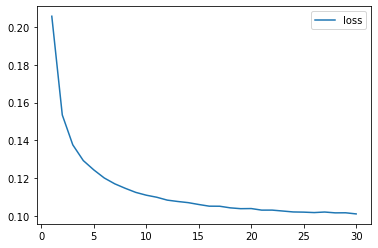

In [28]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

<AxesSubplot:>

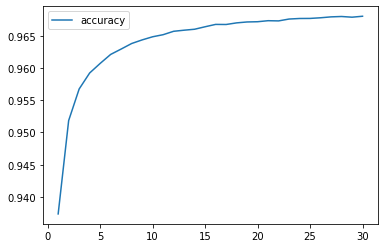

In [29]:
df_plot.plot(y="accuracy")

In [30]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 255)               40545     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 255)               0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 255)               0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 125)               32000     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 125)               0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 125)               0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 60)                7

In [31]:
score = nn.evaluate(X_test, y_test, batch_size=16)

37719/37719 [==============================] - 44s 1ms/step - loss: 0.3780 - accuracy: 0.8591


In [32]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18860/18860 - 15s - loss: 0.0789 - accuracy: 0.9749
Loss: 0.07886897772550583, Accuracy: 0.9749494791030884


In [33]:
#Make predictions
# predictions = nn.predict_classes(X_test_scaled)
predictions = (nn.predict(X_test_scaled) > 0.5).astype("int32")


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    560366
           1       1.00      0.65      0.79     43134

    accuracy                           0.97    603500
   macro avg       0.99      0.83      0.89    603500
weighted avg       0.98      0.97      0.97    603500



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[560258,    108],
       [ 15010,  28124]])